In [1]:
import glob

import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns

from tg import get_data_path, get_root_path
from tg.datasets import DATASET_FACTORY_LOOKUP

# color_palette = list(sns.color_palette("pastel").as_hex())
color_palette = list(sns.color_palette("husl", 9).as_hex())

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dict_dataset_names = {
    "AIR_PASSENGERS": "Passageiros aéreos",
    "HOMICIDES": 'Homicídios dolosos no RJ',
    "NOISY_SINE30": "Seno ruidoso",
    "PERFECT_SINE30": "Seno perfeito",
    "RANDOM_WALK": "Caminhada aleatória"
}

dict_column_names = {
    "params.model_name": "Modelo",
    "metrics.rmse": "RMSE",
    "metrics.mae": "MAE",
    "metrics.mape": "MAPE",
    "metrics.smape": "sMAPE",
    "params.dataset_name": "Conjunto de dados"
}


In [3]:
mlflow.set_tracking_uri("file:///{}".format(get_root_path("mlruns")))
experiment = mlflow.get_experiment('0')

In [4]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs['artifact_uri'] = runs['artifact_uri'].apply(lambda x: x.replace(
    x.split('mlruns')[0], 'file///{}'.format(get_root_path(""))).replace(
        '\\', '/'))
runs.head(3)

Traceback (most recent call last):
  File "c:\Users\Gustavo-pessoal\programming\tg\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 826, in _list_run_infos
    run_info = self._get_run_info_from_dir(r_dir)
  File "c:\Users\Gustavo-pessoal\programming\tg\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 658, in _get_run_info_from_dir
    meta = FileStore._read_yaml(run_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\Users\Gustavo-pessoal\programming\tg\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 1075, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\Users\Gustavo-pessoal\programming\tg\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 1068, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\Users\Gustavo-pessoal\programming\tg\.venv\lib\site-packages\mlflow\utils\file_utils.py", line 181, in read_yaml
    raise MissingConfigException("Yaml file '%s' does

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mae,metrics.rmse,metrics.smape,metrics.mape,params.params,params.model_name,params.dataset_name,params.n_train_points,tags.mlflow.user,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName
0,ebf9b1e6e3b74fc990dbb4b626ec3c4c,0,FINISHED,file///C:/Users/Rafa/Documents/Github/tg/mlrun...,2022-11-06 18:13:28.227000+00:00,2022-11-06 18:13:29.352000+00:00,0.009454,0.012435,0.482617,0.968824,"{'alpha': 0.009396473889829494, 'damped_trend'...",ES_ELM,RANDOM_WALK,110,Rafa,374b8ac2ca56b19b12f8487cbb6f04517c4e8016,LOCAL,.\src\tg\main.py,enthused-loon-481
1,b8b676aaffed4e6d907f8918f40cc852,0,FINISHED,file///C:/Users/Rafa/Documents/Github/tg/mlrun...,2022-11-06 17:59:44.077000+00:00,2022-11-06 17:59:44.741000+00:00,0.009955,0.012853,0.518453,1.040594,"{'alpha': 0.0003607294403623374, 'damped_trend...",ES_ELM,RANDOM_WALK,110,Rafa,374b8ac2ca56b19b12f8487cbb6f04517c4e8016,LOCAL,.\src\tg\main.py,sedate-grub-525
2,bbd5bb21d1224b48bfd44d5f1aa3dd4c,0,FINISHED,file///C:/Users/Rafa/Documents/Github/tg/mlrun...,2022-11-06 17:59:16.063000+00:00,2022-11-06 17:59:21.636000+00:00,26.988260,33.721142,3.427171,6.916167,"{'alpha': 0.006850461336557157, 'damped_trend'...",ES_ELM,HOMICIDES,110,Rafa,374b8ac2ca56b19b12f8487cbb6f04517c4e8016,LOCAL,.\src\tg\main.py,thundering-koi-616


In [5]:
    # 'NAIVE': _get_default_input,
    # 'ARIMA': _get_default_input,
    # 'SARIMA': _get_default_input,
    # 'RNN': _get_lagged_input,
    # 'SVR': _get_lagged_input,
    # 'ELM': _get_lagged_input,
    # 'STL': _get_default_input,
    # 'ES': _get_default_input,
    # 'LSTM': _get_lagged_input,
    # 'ARIMA_RNN': _get_default_input,
    # 'SARIMA_SVR': _get_default_input,
    # 'STL_ELM': _get_default_input,
    # 'ES_LSTM': _get_default_input

In [5]:
metrics_table = runs[[
    "params.model_name", "metrics.rmse", "metrics.mape", "metrics.smape",
    "metrics.mae", "params.dataset_name"
]].copy()

metrics_table = metrics_table.rename(columns=dict_column_names)

columns_order = ["Modelo", "Conjunto de dados", "RMSE", "MAE", "MAPE", "sMAPE"]

metrics_table["Conjunto de dados"] = metrics_table[
    "Conjunto de dados"].replace(dict_dataset_names)

metrics_table = metrics_table.sort_values(["sMAPE"]).drop_duplicates(
    subset=["Conjunto de dados", "Modelo"],
    keep="first").sort_values(["Conjunto de dados",
                               "sMAPE"]).reset_index(drop=True)

np.round(metrics_table, 4).head(3)

,Modelo,RMSE,MAPE,sMAPE,MAE,Conjunto de dados
0,ES,0.0111,0.7015,0.3521,0.0068,Caminhada aleatória
1,ARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória
2,SARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória


In [6]:
np.round(
    metrics_table[metrics_table['Conjunto de dados'] ==
                  dict_dataset_names['RANDOM_WALK']], 4)


,Modelo,RMSE,MAPE,sMAPE,MAE,Conjunto de dados
0,ES,0.0111,0.7015,0.3521,0.0068,Caminhada aleatória
1,ARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória
2,SARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória
3,ELM,0.0116,0.9051,0.4517,0.0088,Caminhada aleatória
4,SARIMA_SVR,0.0115,0.9245,0.4618,0.0088,Caminhada aleatória
5,STL_ELM,0.0127,1.0729,0.5379,0.0105,Caminhada aleatória
6,SVR,0.0127,1.0839,0.5398,0.0105,Caminhada aleatória
7,ARIMA_RNN,0.0146,1.1950,0.5979,0.0117,Caminhada aleatória
8,RNN,0.0258,1.8571,0.9171,0.0187,Caminhada aleatória
9,ES_LSTM,0.0240,2.1078,1.0452,0.0203,Caminhada aleatória


In [7]:
# _metrics_table = metrics_table[columns_order].round(1).set_index(
#     ["Conjunto de dados", "Modelo"])
# latex_metrics_table = _metrics_table.to_latex()
# print(latex_metrics_table)

In [8]:
preds = []
for _, row in runs[[
        "params.model_name", "params.dataset_name", "artifact_uri"
]].iterrows():
    model = row["params.model_name"]
    dataset = row["params.dataset_name"]
    artifact_uri = row["artifact_uri"].split("///")[-1]
    glob_pattern = f"{artifact_uri}/*.csv"
    aux = glob.glob(glob_pattern)
    if len(aux) > 0:
        path = aux[0]
        preds.append(pd.read_csv(path).iloc[:, 1].values)
    else:
        preds.append(np.nan)

runs["Predições"] = preds

In [9]:
preds_table = runs[[
    "params.model_name", "metrics.rmse", "metrics.mape", "metrics.smape",
    "metrics.mae", "params.dataset_name", "Predições"
]].copy()

preds_table = preds_table.rename(columns=dict_column_names)
columns_order = [
    "Modelo", "Conjunto de dados", "RMSE", "MAE", "MAPE", "sMAPE", "Predições"
]

preds_table["Conjunto de dados"] = preds_table["Conjunto de dados"].replace(
    dict_dataset_names)

preds_table = preds_table.sort_values(["sMAPE"]).drop_duplicates(
    subset=["Conjunto de dados", "Modelo"],
    keep="first").sort_values(["Conjunto de dados",
                               "sMAPE"]).reset_index(drop=True).dropna()

np.round(preds_table, 4)

,Modelo,RMSE,MAPE,sMAPE,MAE,Conjunto de dados,Predições
0,ES,0.0111,0.7015,0.3521,0.0068,Caminhada aleatória,"[1.4545454542745244, 1.3727272735400635, 1.309..."
1,ARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória,"[1.4545454545454657, 1.37272725877498, 1.30909..."
2,SARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória,"[1.4545454545454657, 1.37272725877498, 1.30909..."
3,ELM,0.0116,0.9051,0.4517,0.0088,Caminhada aleatória,"[1.4598205817363, 1.380376889158171, 1.3165024..."
4,SARIMA_SVR,0.0115,0.9245,0.4618,0.0088,Caminhada aleatória,"[1.4551772004858463, 1.3788419538323151, 1.308..."
5,ES_ELM,0.0124,0.9688,0.4826,0.0095,Caminhada aleatória,"[1.4602997743282446, 1.3836173570617083, 1.315..."
6,STL_ELM,0.0127,1.0729,0.5379,0.0105,Caminhada aleatória,"[1.463540809985827, 1.3851957044445846, 1.3179..."
7,SVR,0.0127,1.0839,0.5398,0.0105,Caminhada aleatória,"[1.461173849771065, 1.3901276134555207, 1.3172..."
8,ARIMA_RNN,0.0146,1.1950,0.5979,0.0117,Caminhada aleatória,"[1.4483178, 1.3878971, 1.3466333, 1.2407963, 1..."
9,RNN,0.0258,1.8571,0.9171,0.0187,Caminhada aleatória,"[1.4620461, 1.4327053, 1.311759, 1.2662796, 1...."


In [15]:
HYBRID_MODELS = ["ARIMA_RNN", "SARIMA_SVR", "STL_ELM", "ES_LSTM", "ES_ELM"]
model_names = HYBRID_MODELS
ALL_MODELS = [
        'NAIVE', 'ARIMA', 'SARIMA', 'RNN', 'SVR', 'ELM', 'STL', 'ES', 'LSTM',
        'ARIMA_RNN', 'SARIMA_SVR', 'STL_ELM', 'ES_LSTM'
    ]
# 'ELM', 'STL'

In [16]:
HYBRID_TRIPLES = [
    ("ARIMA", "RNN", "ARIMA_RNN"),
    ("SARIMA", "SVR", "SARIMA_SVR"),
    ("STL", "ELM", "STL_ELM"),
    ("ES", "LSTM", "ES_LSTM"),
    ("ES", "ELM", "ES_ELM"),
]


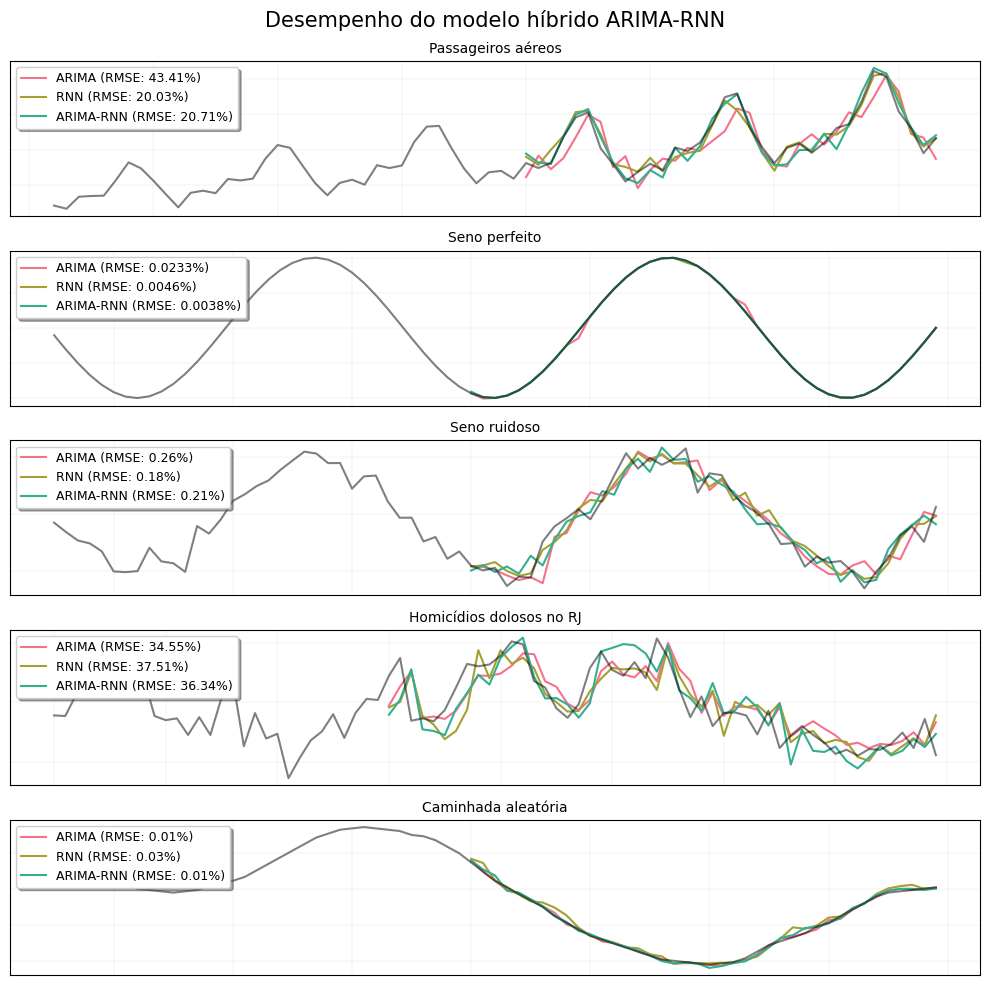

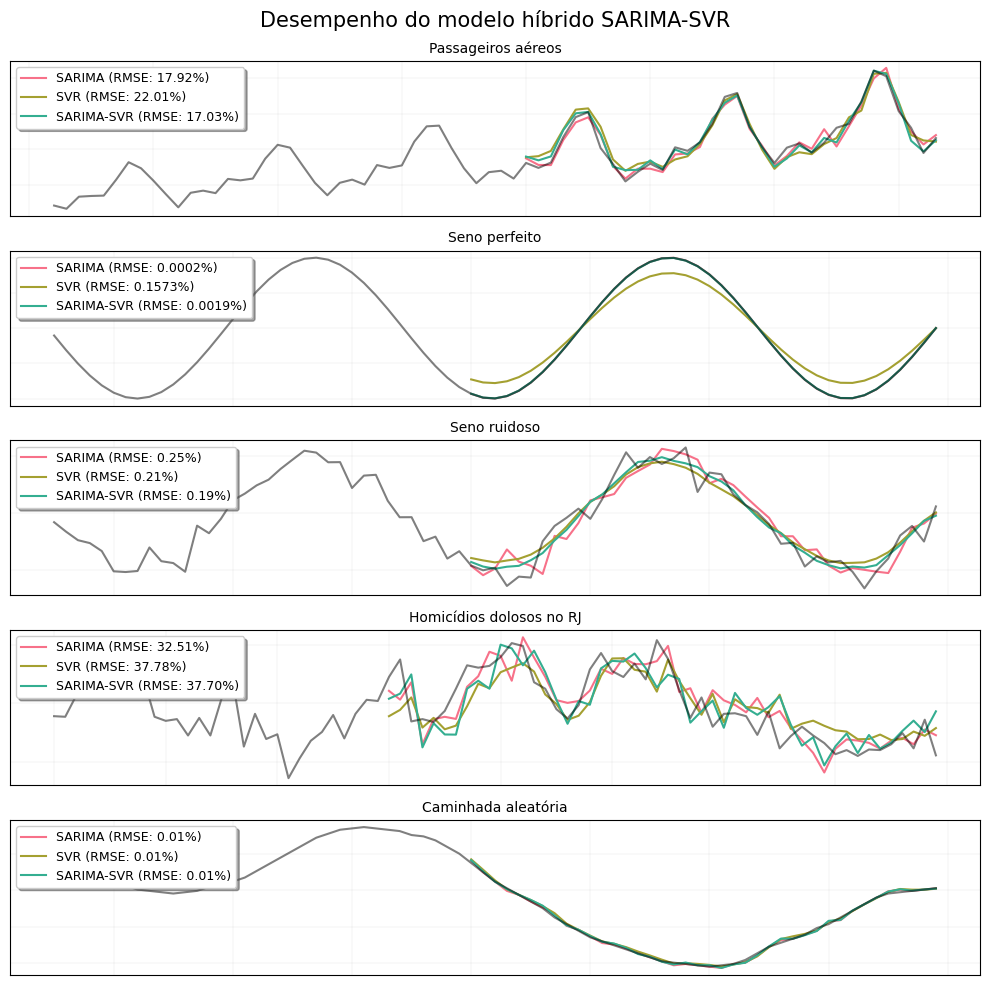

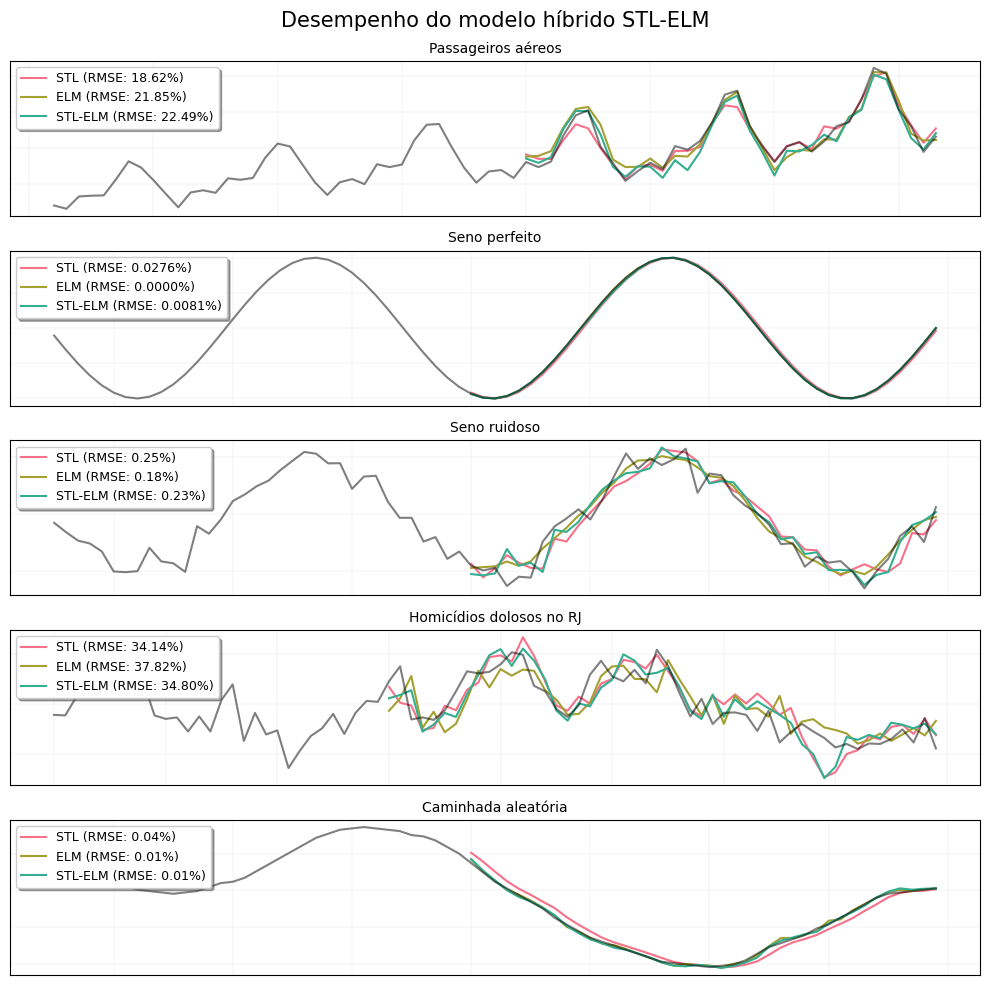

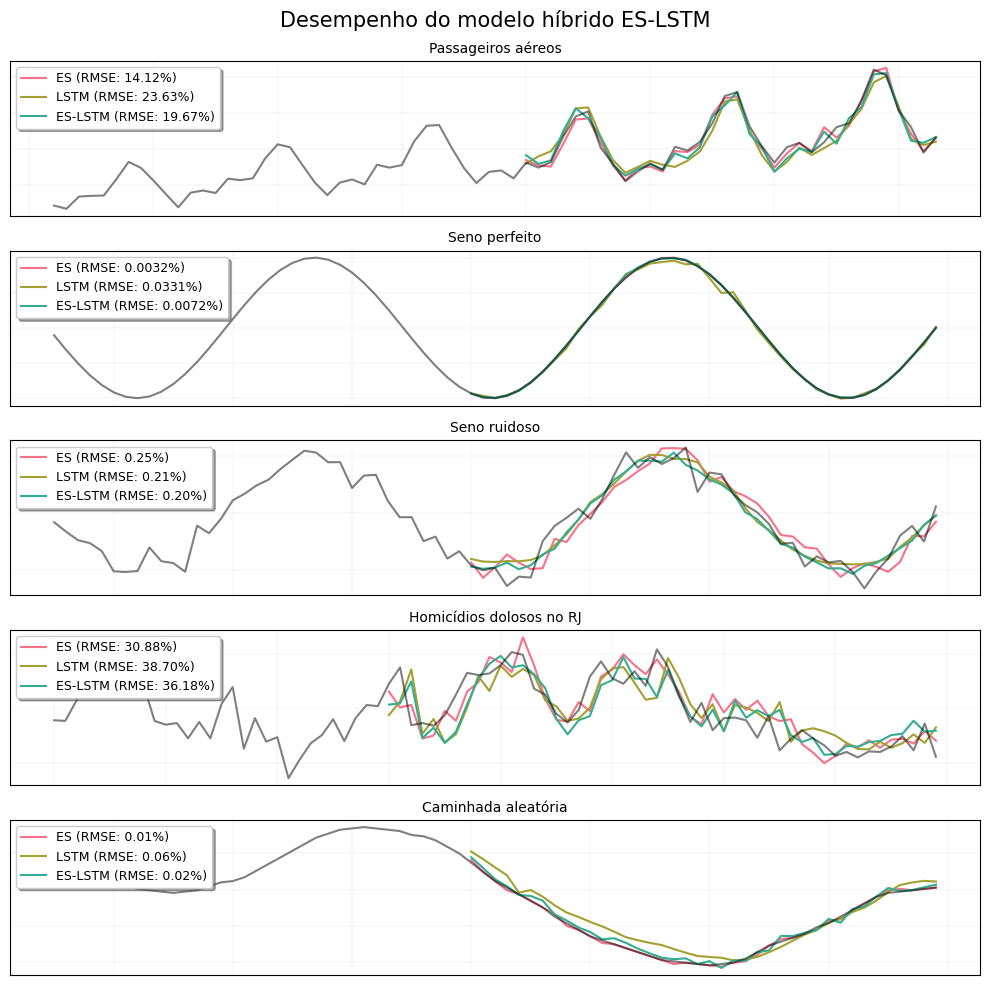

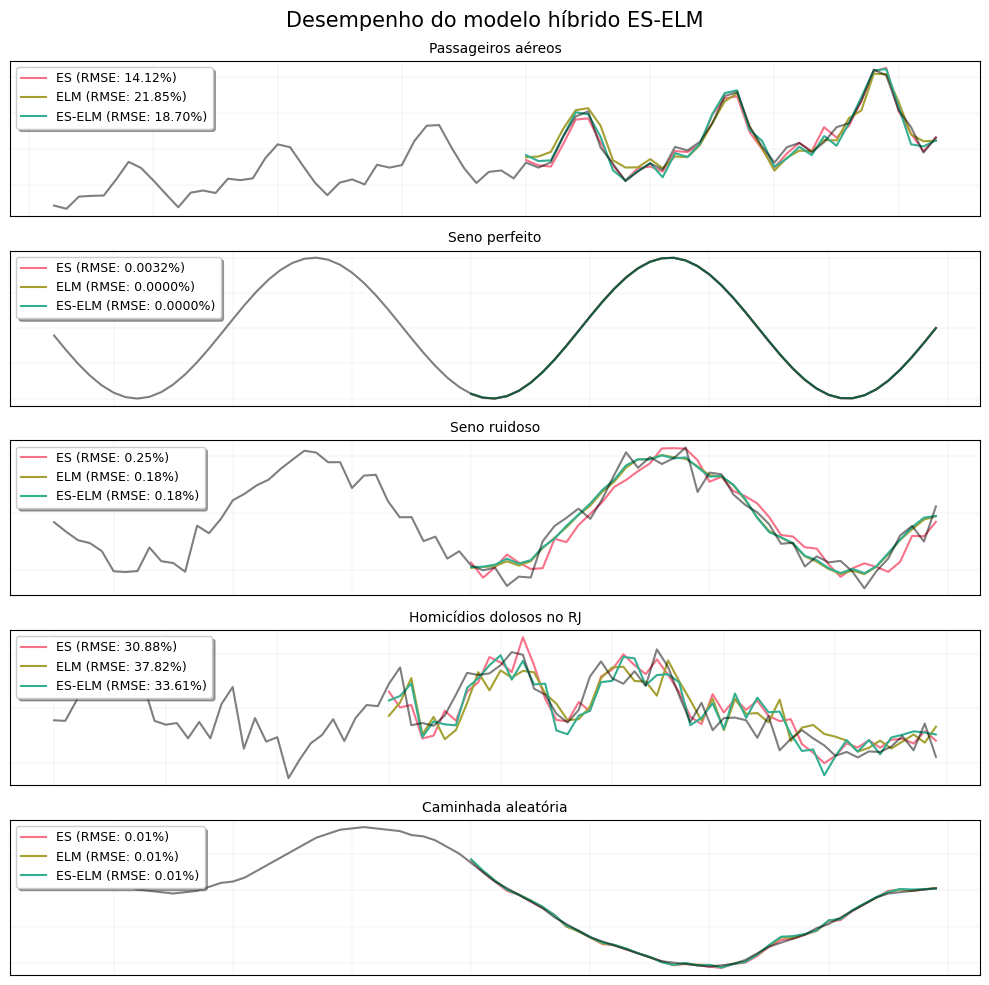

In [11]:
# dataset_name = list(DATASET_FACTORY_LOOKUP.keys())[0]

for model_triple in HYBRID_TRIPLES:

    fig, axs = plt.subplots(5, 1, figsize=(10, 10))

    for i, dataset_name in enumerate(DATASET_FACTORY_LOOKUP.keys()):

        series = DATASET_FACTORY_LOOKUP[dataset_name]()

        for j, model in enumerate(model_triple):
            aux_data = preds_table.loc[(preds_table['Modelo'] == model) &
                                    (preds_table['Conjunto de dados'] ==
                                        dict_dataset_names[dataset_name]), :]
            aux_pred = aux_data['Predições'].values[0]
            aux_model = '-'.join(model.split('_')).upper()

            if dataset_name == 'PERFECT_SINE30':
                axs[i].plot(range(len(series) - len(aux_pred), len(series)),
                            aux_pred,
                            color=color_palette[2*j],
                            label="{} (RMSE: {:.4f}%)".format(
                                aux_model, aux_data['RMSE'].values[0]))
            else:
                axs[i].plot(range(len(series) - len(aux_pred), len(series)),
                            aux_pred,
                            color=color_palette[2*j],
                            label="{} (RMSE: {:.2f}%)".format(
                                aux_model, aux_data['RMSE'].values[0]))

        axs[i].set_title(dict_dataset_names[dataset_name], fontsize=10)
        half_size = int(len(series) / 2)
        axs[i].plot(range(len(series) - half_size, len(series)), series[-half_size:], color='black', alpha=0.5)

    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.legend(fontsize=9, shadow=True, loc='upper left')
    ax.grid(linewidth=0.15)

        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)

        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.legend(fontsize=9, shadow=True, loc='upper left')
        ax.grid(linewidth=0.10)

    fig.suptitle("Desempenho do modelo híbrido {}".format(
        aux_model),
                    fontsize=15)
    plt.tight_layout()
    plt.savefig(get_root_path("reports/desempenho_hibridos_{}.png".format(
            model.lower())),
                    dpi=300)
    plt.show()


In [12]:
import re
import unicodedata
from math import log10, floor

def find_exp(number) -> int:
    base10 = log10(abs(number))
    return abs(floor(base10))

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode("utf-8")

groups = (
    preds_table.melt(  
        id_vars = ["Modelo", "Conjunto de dados"], 
        value_vars=["RMSE","MAPE","sMAPE","MAE"], 
        var_name = "Métrica", 
        value_name="Valor"
    )
    .query("Modelo != 'NAIVE'")
    .pivot_table(values="Valor", index = ["Conjunto de dados", "Modelo"], columns="Métrica")
    .groupby("Conjunto de dados")
)

rotate = lambda x: R"\STAB{\rotatebox[origin=c]{90}{" + x + R"}}"

tables = ""
for name, gp in list(groups):
    gp.columns.name = ""
    
    min_number = gp.min().min()
    max_exp = max(2, find_exp(min_number))
    format_str = f"{{:.{max_exp}f}}"

    colformat = ['c'] * (len(gp.columns) + 2)
    colformat = "" + " ".join(colformat) + ""
        
    t = (
        gp.style.highlight_min(
            color="none", 
            axis = 0, 
            props = "font-weight:bold"
        )
        .format(format_str.format)
        .format_index(escape="latex", axis=1)
        .format_index(escape="latex", axis=0)
        .to_latex(
            hrules=True, 
            convert_css=True, 
            column_format=colformat, 
            environment="table",
            caption=f"Comparação entre métricas no conjunto de dados {name}",
            label=f"results_{'_'.join(remove_accents(name).split())}", 
            position='H', 
            position_float="centering",
        )
    )
    tables += f"""{t}"""


pre = R"\newcommand{\STAB}[1]{\begin{tabular}{@{}c@{}}#1\end{tabular}}"
latex = pre + f"""\n{tables}"""

regex = r"(:?\\multirow\[c\]\{\d+\}\{\*\}\{)(:?[\w\s]+)(:?\})"
latex = re.sub(regex, r"\g<1>\\STAB{\\rotatebox[origin=c]{90}{\g<2>}}\g<3>", latex)

with open(get_root_path("reports/tables.tex"), "w+", encoding="utf-8") as f:
    f.write(latex)


In [13]:
modeltype_comparing_table = preds_table.groupby(['Conjunto de dados', 'Tipo dos modelos']).agg(['mean', 'median']).round(4)
modeltype_comparing_table

C:\Users\Rafa\AppData\Local\Temp\ipykernel_14348\690679148.py:1: FutureWarning: ['Modelo', 'Predições'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  modeltype_comparing_table = preds_table.groupby(


RMSE              MAPE           \
                                              mean   median     mean   median   
Conjunto de dados        Tipo dos modelos                                       
Caminhada aleatória      Híbridos           0.0151   0.0127   1.2538   1.0729   
                         Não híbridos       0.0230   0.0121   1.8666   0.9945   
Homicídios dolosos no RJ Híbridos          35.7266  36.1773   7.2906   7.3154   
                         Não híbridos      35.4851  36.0305   7.2047   7.2246   
Passageiros aéreos       Híbridos          19.7189  19.6720   3.7090   3.7372   
                         Não híbridos      22.7001  20.9429   4.2882   3.9119   
Seno perfeito            Híbridos           0.0042   0.0038   0.1373   0.1170   
                         Não híbridos       0.0312   0.0140   1.5914   0.2331   
Seno ruidoso             Híbridos           0.2032   0.1980  11.3135  11.0813   
                         Não híbridos       0.2256   0.2316  12.4142  12.7150   

                                            sMAPE              MAE           
                                             mean  median     mean   median  
Conjunto de dados        Tipo dos modelos                                    
Caminhada aleatória      Híbridos          0.6251  0.5379   0.0121   0.0105  
                         Não híbridos      0.9192  0.4958   0.0183   0.0096  
Homicídios dolosos no RJ Híbridos          3.6340  3.6763  28.6004  28.5270  
                         Não híbridos      3.5789  3.6176  28.4029  28.3548  
Passageiros aéreos       Híbridos          1.8725  1.8816  15.5945  16.0362  
                         Não híbridos      2.1430  1.9319  18.1786  16.1919  
Seno perfeito            Híbridos          0.0686  0.0585   0.0024   0.0018  
                         Não híbridos      0.7627  0.1170   0.0250   0.0043  
Seno ruidoso             Híbridos          5.3335  5.2485   0.1631   0.1613  
                         Não híbridos      5.8533  5.9498   0.1791   0.1827

In [14]:
dataset_name = "Passageiros aéreos"

df_aux = pd.DataFrame()
for dataset_name in np.unique([x[0] for x in modeltype_comparing_table.index]):
    aux = modeltype_comparing_table.loc[dataset_name]
    df_aux = pd.concat([df_aux, pd.DataFrame(100 * np.round((aux.iloc[1, :] - aux.iloc[0, :]) / aux.iloc[1, :], 3), columns=[dataset_name])], axis=1)

df_aux

Caminhada aleatória  Homicídios dolosos no RJ  \
RMSE  mean                   34.3                      -0.7   
      median                 -5.0                      -0.4   
MAPE  mean                   32.8                      -1.2   
      median                 -7.9                      -1.3   
sMAPE mean                   32.0                      -1.5   
      median                 -8.5                      -1.6   
MAE   mean                   33.9                      -0.7   
      median                 -9.4                      -0.6   

              Passageiros aéreos  Seno perfeito  Seno ruidoso  
RMSE  mean                  13.1           86.5           9.9  
      median                 6.1           72.9          14.5  
MAPE  mean                  13.5           91.4           8.9  
      median                 4.5           49.8          12.8  
sMAPE mean                  12.6           91.0           8.9  
      median                 2.6           50.0          11.8  
MAE   mean                  14.2           90.4           8.9  
      median                 1.0           58.1          11.7

In [15]:
df_aux.mean(axis=1)

RMSE   mean      28.62
       median    17.62
MAPE   mean      29.08
       median    11.58
sMAPE  mean      28.60
       median    10.86
MAE    mean      29.34
       median    12.16
dtype: float64

In [16]:
time_table = runs[[
    "params.model_name", "metrics.rmse", "metrics.mape", "metrics.smape",
    "metrics.mae", "params.dataset_name", "start_time", "end_time"
]].copy()

time_table = time_table.rename(columns=dict_column_names)

columns_order = ["Modelo", "Conjunto de dados", "RMSE", "MAE", "MAPE", "sMAPE"]

time_table["Conjunto de dados"] = time_table["Conjunto de dados"].replace(
    dict_dataset_names)

time_table = time_table.sort_values(["sMAPE"]).drop_duplicates(
    subset=["Conjunto de dados", "Modelo"],
    keep="first").sort_values(["Conjunto de dados",
                               "sMAPE"]).reset_index(drop=True)

np.round(time_table, 4).head(3)

,Modelo,RMSE,MAPE,sMAPE,MAE,Conjunto de dados,start_time,end_time
0,ES,0.0111,0.7015,0.3521,0.0068,Caminhada aleatória,2022-10-31 04:22:27.640000+00:00,2022-10-31 04:22:28.581000+00:00
1,ARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória,2022-10-31 19:50:56.188000+00:00,2022-10-31 19:52:39.912000+00:00
2,SARIMA,0.0110,0.7641,0.3829,0.0074,Caminhada aleatória,2022-10-31 19:50:56.892000+00:00,2022-10-31 19:52:22.516000+00:00


In [17]:
time_table['train_time'] = (
    pd.to_datetime(time_table['end_time']) -
    pd.to_datetime(time_table['start_time'])).dt.total_seconds() / 60


In [18]:
time_table_grouped = time_table.groupby(['Modelo']).agg({
    'train_time': ['mean', 'median']
}).round(4).sort_values([('train_time', 'mean')])
time_table_grouped

train_time         
                 mean   median
Modelo                        
NAIVE          0.0014   0.0014
ELM            0.0076   0.0038
STL            0.0171   0.0173
ES_ELM         0.0496   0.0188
SVR            0.0637   0.0113
ES             0.1282   0.1407
STL_ELM        0.1493   0.1330
ARIMA          2.8985   1.7287
RNN            6.9134   7.8892
LSTM           8.4599   9.1316
ARIMA_RNN     15.3923  13.5882
ES_LSTM       17.0241  17.2688
SARIMA        42.4220  19.1946
SARIMA_SVR    50.5462  31.0013